In [1]:
libname d '/folders/myfolders';

SAS Connection established. Subprocess id is 13668




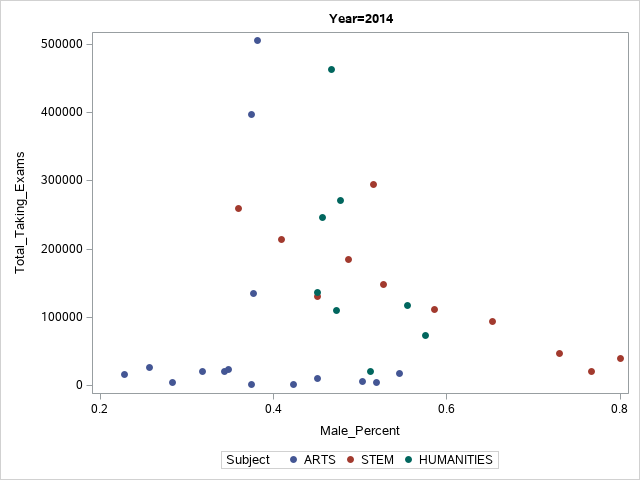
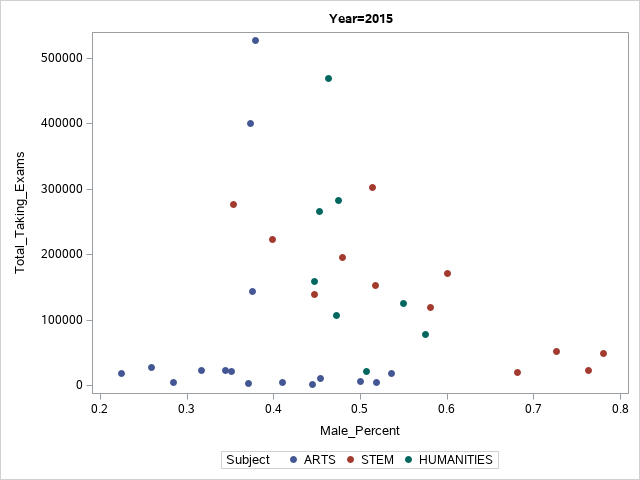
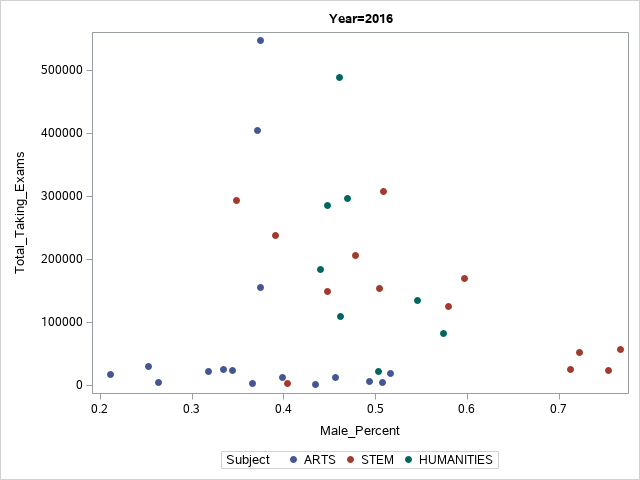
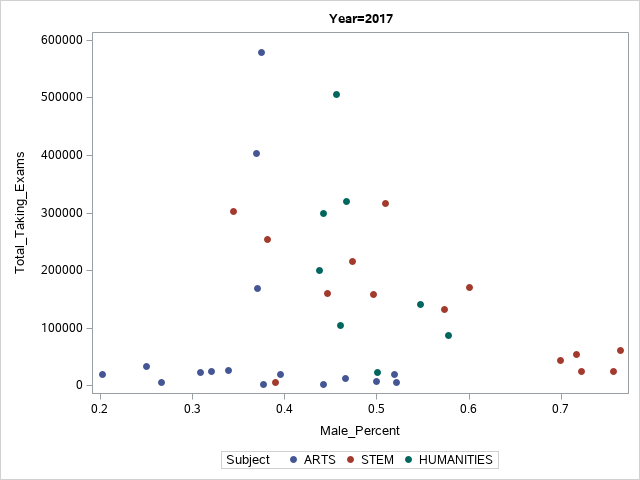
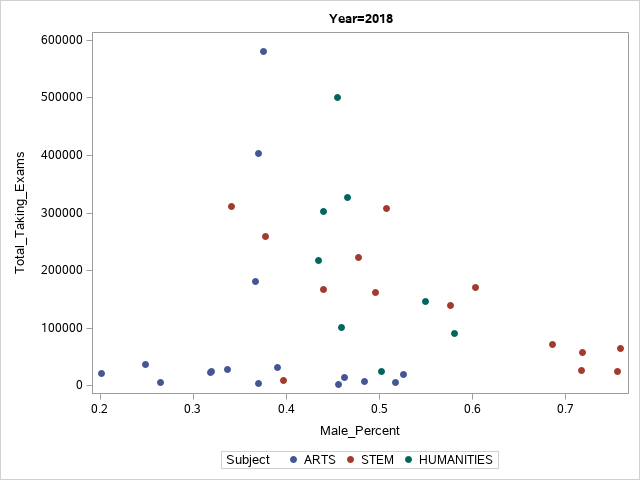

In [2]:
ODS GRAPHICS / IMAGEMAP=ON;
proc sgplot data=d.ap_data;
	by year;
	scatter x= male_percent y=total_taking_exams / 
		tip=(class) group=subject markerattrs=(symbol=CircleFilled);
run;

In [4]:
proc print data= d.ap_data(obs=10);
run;

Obs,Class,Year,Total_Taking_Exams,Male,Male_Percent,Female,Female_Percent,Gender_Gap,Subject
1,ART HISTORY,2014,23213,8077,0.347951579,15136,0.652048421,-0.304096842,ARTS
2,BIOLOGY,2014,213294,87163,0.408651908,126131,0.591348092,-0.182696185,STEM
3,CALCULUS AB,2014,294072,151471,0.515081341,142601,0.484918659,0.030162681,STEM
4,CALCULUS BC,2014,112113,65610,0.585213133,46503,0.414786867,0.170426266,STEM
5,CHEMISTRY,2014,148554,78173,0.526226153,70381,0.473773847,0.052452307,STEM
6,CHINESE LANGUAGE & CULTURE,2014,10728,4831,0.450316928,5897,0.549683072,-0.099366145,ARTS
7,COMPUTER SCIENCE A,2014,39278,31432,0.800244412,7846,0.199755588,0.600488823,STEM
8,ENGLISH LANGUAGE & COMP.,2014,505244,192779,0.381556238,312465,0.618443762,-0.236887524,ARTS
9,ENGLISH LITERATURE & COMP.,2014,397477,148876,0.37455249,248601,0.62544751,-0.25089502,ARTS
10,ENVIRONMENTAL SCIENCE,2014,130321,58776,0.451009431,71545,0.548990569,-0.097981139,STEM


In [21]:
proc sql;
create table d.gap as
    select subject, year, sum(male) as male, sum(female) as female, 
    mean((male/(male+female)) - (female/(male+female))) as g_gap,
    mean(male/female) as ratio
    from d.ap_data
    group by subject, year;
run;

In [8]:
proc means data=d.ap_data;
    class subject year;
    var male female;
run;    

Subject,Year,N Obs,Variable,N,Mean,Std Dev,Minimum,Maximum
ARTS,2014,15,Male Female,15 15,29909.00 49784.00,59082.93 96614.91,874.0000000 1333.00,192779.00 312465.00
,2015,16,Male Female,16 16,29042.75 48689.69,58961.48 97351.68,954.0000000 1350.00,199617.00 327657.00
,2016,16,Male Female,16 16,29916.94 51013.31,60070.24 100651.78,1014.00 1402.00,204927.00 342648.00
,2017,16,Male Female,16 16,31146.13 53400.63,62375.97 104466.53,968.0000000 1356.00,217384.00 362042.00
,2018,16,Male Female,16 16,31808.69 54648.00,62449.20 104509.25,1082.00 1339.00,217626.00 362417.00
HUMANITIES,2014,8,Male Female,8 8,86123.38 93610.63,64578.30 77102.92,10419.00 9942.00,215811.00 246955.00
,2015,8,Male Female,8 8,89911.75 98899.00,65177.84 79140.97,10835.00 10532.00,217643.00 252046.00
,2016,8,Male Female,8 8,94427.13 106006.75,67495.09 83348.92,11075.00 10926.00,225124.00 264167.00
,2017,8,Male Female,8 8,98423.63 111626.75,69853.78 87744.04,11215.00 11189.00,230774.00 274528.00
,2018,8,Male Female,8 8,99870.25 114013.25,69048.65 88044.38,12390.00 12285.00,227920.00 273610.00


In [ ]:
data gap;
    set d.ap_data;
    